# HW3 Support Vector Machine and Decision Trees

# Due on 11/30 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load from file
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

Type your code here

In [4]:
#import the model from sklearn import svm, create the SVC object 
#model = svm.SVC()
#Call Train test split
#print out model performance

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn import svm
model = svm.SVC(kernel='linear')
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[[809  59]
 [289 117]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       868
           1       0.66      0.29      0.40       406

    accuracy                           0.73      1274
   macro avg       0.70      0.61      0.61      1274
weighted avg       0.71      0.73      0.69      1274

0.7268445839874411


### Question 2. Now try different value of C-parameter and rerun your model

Type your code here

In [8]:
# Try C = 2**-5 and 2**5

In [9]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=2**-5)
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)

SVC(C=0.03125, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[[841  65]
 [261 107]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       906
           1       0.62      0.29      0.40       368

    accuracy                           0.74      1274
   macro avg       0.69      0.61      0.62      1274
weighted avg       0.72      0.74      0.71      1274

0.7441130298273155


In [11]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=2**5)
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)

SVC(C=32, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[[813  59]
 [288 114]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       872
           1       0.66      0.28      0.40       402

    accuracy                           0.73      1274
   macro avg       0.70      0.61      0.61      1274
weighted avg       0.71      0.73      0.69      1274

0.7276295133437991


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

Type your code here

In [13]:
from sklearn import svm
model = svm.SVC(kernel='rbf', gamma=2**-5)
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[[819  50]
 [275 130]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       869
           1       0.72      0.32      0.44       405

    accuracy                           0.74      1274
   macro avg       0.74      0.63      0.64      1274
weighted avg       0.74      0.74      0.71      1274

0.7448979591836735


In [15]:
from sklearn import svm
model = svm.SVC(kernel='rbf', gamma=0.1)
X = df.drop('had_affair', axis=1)
Y = df["had_affair"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[[785  88]
 [263 138]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       873
           1       0.61      0.34      0.44       401

    accuracy                           0.72      1274
   macro avg       0.68      0.62      0.63      1274
weighted avg       0.71      0.72      0.70      1274

0.7244897959183674


In [17]:
from sklearn import svm
model = svm.SVC(kernel='rbf', gamma=1)
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[[742 119]
 [306 107]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       861
           1       0.47      0.26      0.33       413

    accuracy                           0.67      1274
   macro avg       0.59      0.56      0.56      1274
weighted avg       0.63      0.67      0.63      1274

0.6664050235478807


In [19]:
from sklearn import svm
model = svm.SVC(kernel='rbf', gamma=2)
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[[783  72]
 [359  60]]
              precision    recall  f1-score   support

           0       0.69      0.92      0.78       855
           1       0.45      0.14      0.22       419

    accuracy                           0.66      1274
   macro avg       0.57      0.53      0.50      1274
weighted avg       0.61      0.66      0.60      1274

0.6616954474097331


### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters?

### Kernel = 'rbf'
### C = 1.0
### gamma = 0.1

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

Type your code here

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[[629 226]
 [325  94]]
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       855
           1       0.29      0.22      0.25       419

    accuracy                           0.57      1274
   macro avg       0.48      0.48      0.47      1274
weighted avg       0.54      0.57      0.55      1274

0.5675039246467818


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

Type your code here

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = DecisionTreeClassifier(max_depth=2, criterion='gini')
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test,predictions))

[[771  81]
 [280 142]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       852
           1       0.64      0.34      0.44       422

    accuracy                           0.72      1274
   macro avg       0.69      0.62      0.63      1274
weighted avg       0.70      0.72      0.69      1274

0.716640502354788


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = DecisionTreeClassifier(max_depth=3, criterion='gini')
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test,predictions))

[[748 110]
 [256 160]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       858
           1       0.59      0.38      0.47       416

    accuracy                           0.71      1274
   macro avg       0.67      0.63      0.63      1274
weighted avg       0.70      0.71      0.69      1274

0.7127158555729984


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test,predictions))

[[826  58]
 [274 116]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       884
           1       0.67      0.30      0.41       390

    accuracy                           0.74      1274
   macro avg       0.71      0.62      0.62      1274
weighted avg       0.73      0.74      0.70      1274

0.7394034536891679


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test,predictions))

[[781 108]
 [224 161]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       889
           1       0.60      0.42      0.49       385

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

0.7394034536891679


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test,predictions))

[[778  59]
 [306 131]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       837
           1       0.69      0.30      0.42       437

    accuracy                           0.71      1274
   macro avg       0.70      0.61      0.61      1274
weighted avg       0.71      0.71      0.68      1274

0.7135007849293563


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
X = df.drop('had_affair', axis=1)
Y = df['had_affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test,predictions))

[[758  93]
 [280 143]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       851
           1       0.61      0.34      0.43       423

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.62      1274
weighted avg       0.69      0.71      0.68      1274

0.707221350078493


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

Answer: 

### The max depth is important since it will decrease the training errors. It effectively affects the accuracy. Max depth of 2 gives us a higher accuracy. Since criterion isn't important,we can just go with gini. 

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [29]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'had_affair', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6'],
      dtype='object')

In [30]:

features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair']

In [31]:
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot
# Pick up all featurs columns from your data frame
features = list(df.drop(['had_affair'],axis=1).columns)
features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

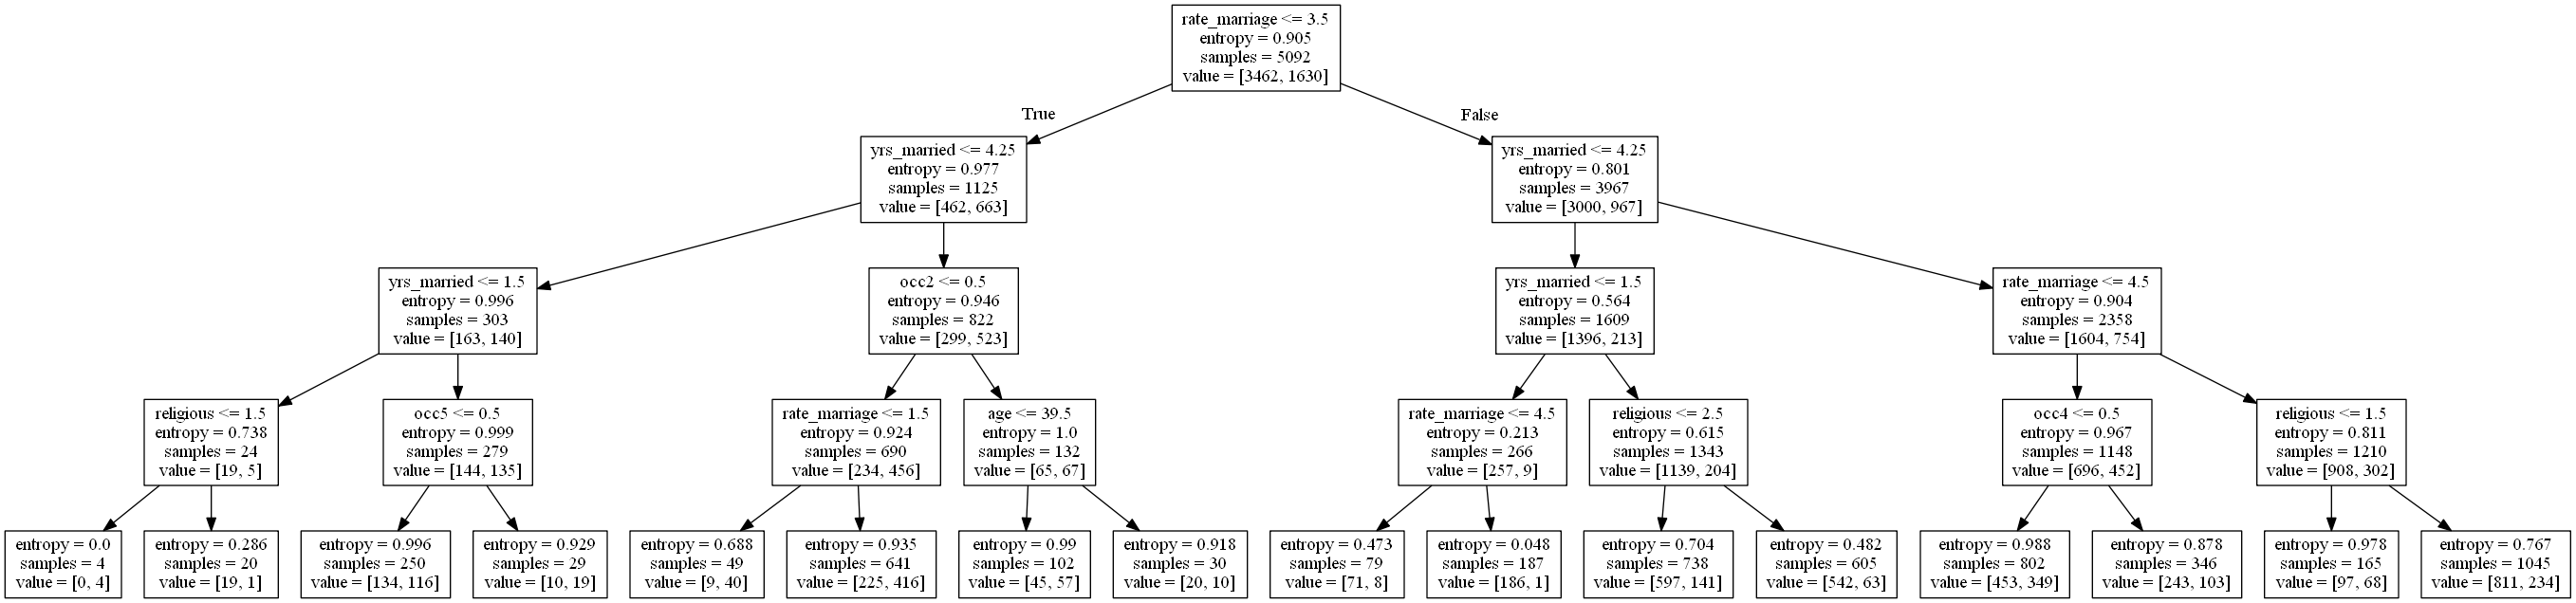

In [32]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image( .create_png())

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

Type your code here

In [33]:
# Hint 
# model1 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model1.fit(X_train, y_train)
# model2 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model2.fit(X_train, y_train)
# model3 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model3.fit(X_train, y_train)
# Then display all 3 trees

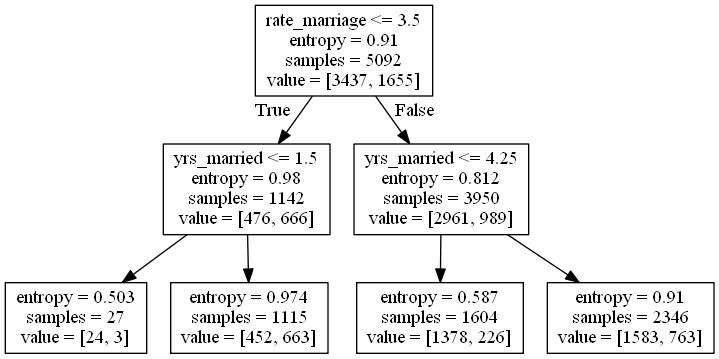

In [34]:
model1 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
X = df.drop('had_affair', axis=1)
y = df['had_affair']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model1.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(model1, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

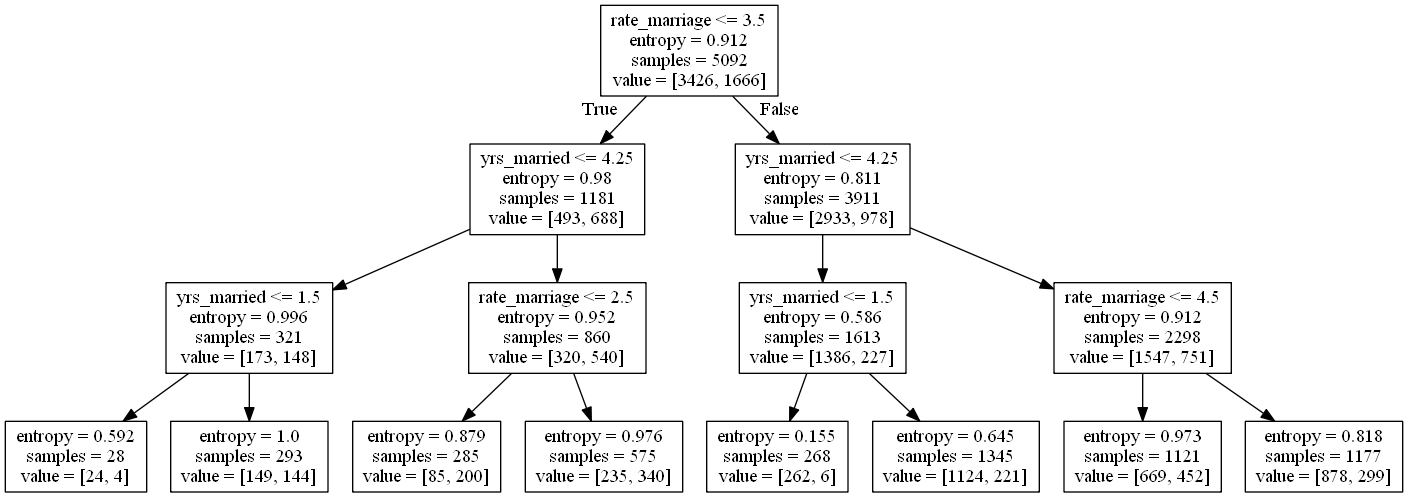

In [35]:
model2 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
X = df.drop('had_affair', axis=1)
y = df['had_affair']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model2.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(model2, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

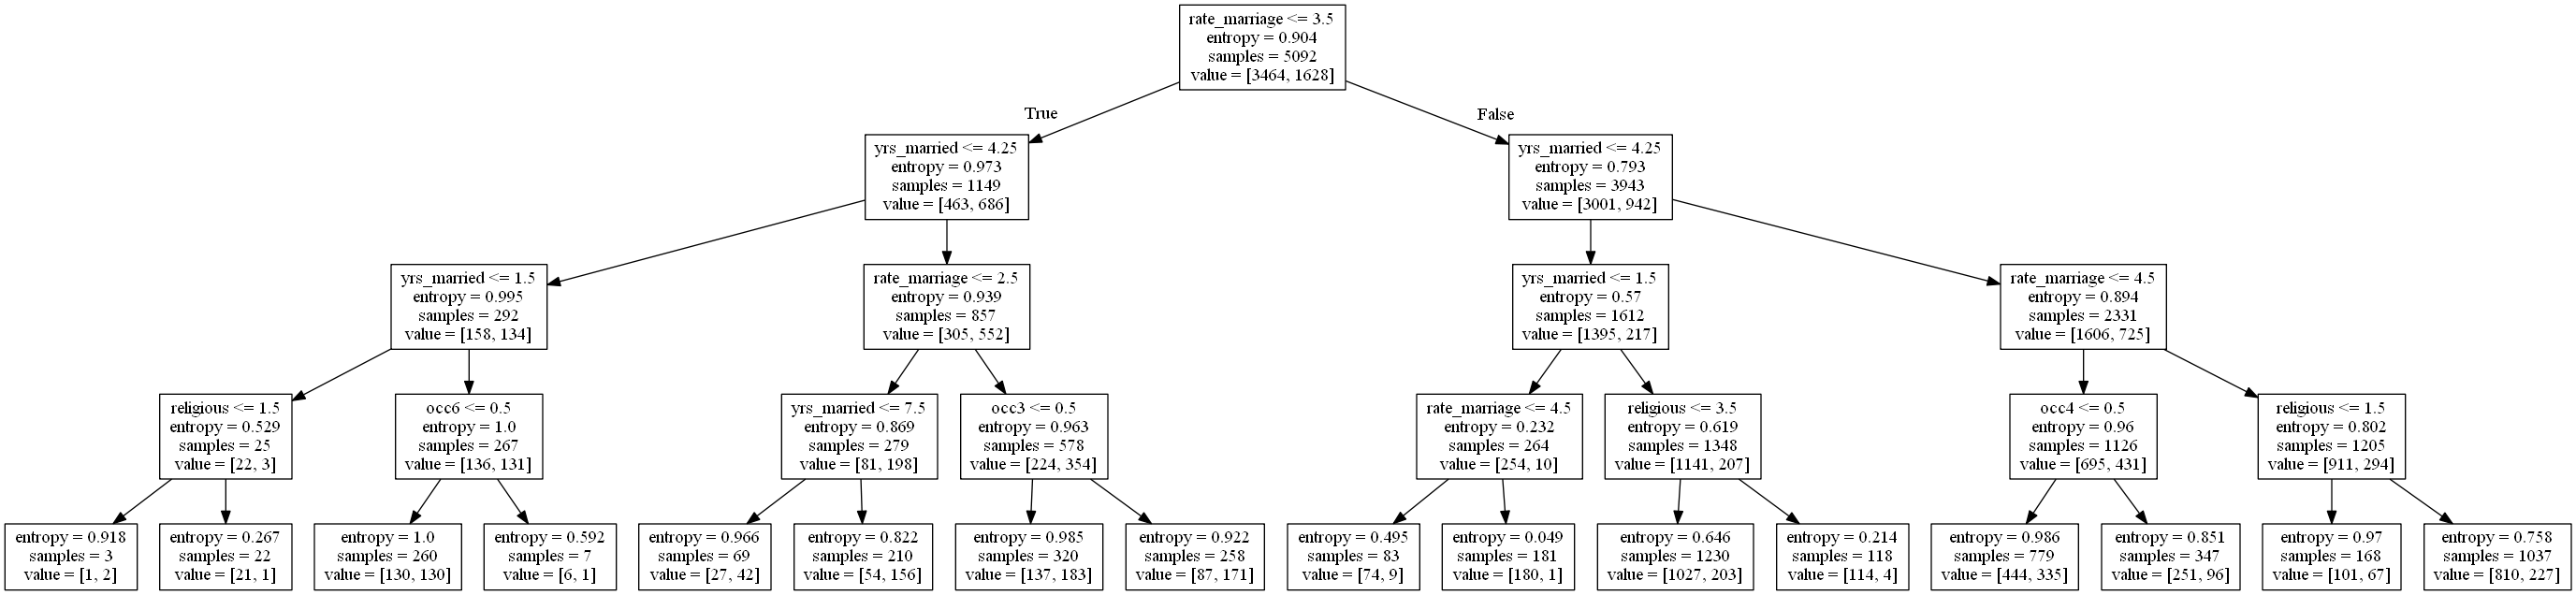

In [36]:
model3 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
X = df.drop('had_affair', axis=1)
y = df['had_affair']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model3.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(model3, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

Type your code here

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train, y_train)
rfc_prediction = rfc_model.predict(X_test)
print(confusion_matrix(y_test, rfc_prediction))
print(classification_report(y_test, rfc_prediction))
print(accuracy_score(y_test, rfc_prediction))

[[667 182]
 [244 181]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       849
           1       0.50      0.43      0.46       425

    accuracy                           0.67      1274
   macro avg       0.62      0.61      0.61      1274
weighted avg       0.65      0.67      0.66      1274

0.6656200941915228
